In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import btrdb
import plotly
import pprint
import pathlib
import numpy as np

In [8]:
pprint.pprint([(x.__name__, x.__version__) for x in [pd, sns, plotly]])

[('pandas', '2.0.2'), ('seaborn', '0.12.2'), ('plotly', '5.15.0')]


In [9]:
conn = btrdb.connect(profile="andy")
pprint.pprint(conn.info())

{'build': '5.29.0',
 'majorVersion': 5,
 'minorVersion': 29,
 'proxy': {'proxyEndpoints': []}}


## Benchmark Results for Single Stream Reads

In [13]:
fnames = list(pathlib.Path().glob("single_stream*.csv"))
print(fnames)

[PosixPath('single_stream_raw_val.csv'), PosixPath('single_stream_windows.csv'), PosixPath('single_stream_aligned_windows.csv')]


In [14]:
dfs = [pd.read_csv(filepath_or_buffer=f, header=0, index_col=0) for f in fnames]

In [20]:
read_df = pd.concat(dfs).drop(columns=["Index"])
read_df = read_df.convert_dtypes(dtype_backend="pyarrow")
display(read_df.info())
display(read_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 119
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   n_points            300 non-null    int64[pyarrow] 
 1   func_name           300 non-null    string[pyarrow]
 2   replica             300 non-null    int64[pyarrow] 
 3   n_streams           300 non-null    int64[pyarrow] 
 4   width_ns            120 non-null    int64[pyarrow] 
 5   pw                  120 non-null    int64[pyarrow] 
 6   uuid                300 non-null    string[pyarrow]
 7   total_points        300 non-null    int64[pyarrow] 
 8   total_time_seconds  300 non-null    double[pyarrow]
 9   stream_version      300 non-null    int64[pyarrow] 
dtypes: double[pyarrow](1), int64[pyarrow](7), string[pyarrow](2)
memory usage: 45.3 KB


None

,n_points,func_name,replica,n_streams,width_ns,pw,uuid,total_points,total_time_seconds,stream_version
0,10000,time_single_stream_arrow_raw_values,0,1,<NA>,<NA>,29381d06-3ea9-4403-bbc3-222eb5b1702b,10000,0.056478,0
1,10000,time_single_stream_arrow_raw_values,1,1,<NA>,<NA>,29381d06-3ea9-4403-bbc3-222eb5b1702b,10000,0.055691,0
2,10000,time_single_stream_arrow_raw_values,2,1,<NA>,<NA>,29381d06-3ea9-4403-bbc3-222eb5b1702b,10000,0.059283,0
3,10000,time_single_stream_arrow_raw_values,3,1,<NA>,<NA>,29381d06-3ea9-4403-bbc3-222eb5b1702b,10000,0.060607,0
4,10000,time_single_stream_arrow_raw_values,4,1,<NA>,<NA>,29381d06-3ea9-4403-bbc3-222eb5b1702b,10000,0.060758,0


In [69]:
func_group_aligned_win = read_df.groupby(
    ["func_name", "total_points", "n_points", "pw"]
)
func_group_win = read_df.groupby(["func_name", "total_points", "n_points", "width_ns"])
func_group_raw = read_df[read_df.func_name.str.contains("raw")].groupby(
    ["func_name", "n_points", "total_points"]
)

In [70]:
avg_time_aligned = func_group_aligned_win.total_time_seconds.agg(["mean", "std"])
avg_time_win = func_group_win.total_time_seconds.agg(["mean", "std"])
avg_time_raw = func_group_raw.total_time_seconds.agg(["mean", "std"])

In [78]:
avg_time_aligned

mean  \
func_name                                       total_points n_points pw             
time_single_stream_aligned_windows_values       36           10000    38  0.046963   
                                                145          10000    36  0.051344   
                                                363          100000   38  0.051241   
                                                1455         100000   36  0.071450   
                                                3638         1000000  38  0.076830   
                                                10913        3000000  38  0.104706   
                                                14552        1000000  36  0.160669   
                                                18189        5000000  38  0.131935   
                                                36379        10000000 38  0.191556   
                                                43655        3000000  36  0.305020   
                                                72759        5000000  36  0.462111   
                                                145519       10000000 36  0.841226   
time_single_stream_arrow_aligned_windows_values 36           10000    38  0.051862   
                                                145          10000    36  0.051688   
                                                363          100000   38  0.050124   
                                                1455         100000   36  0.066175   
                                                3638         1000000  38  0.066163   
                                                10913        3000000  38  0.084391   
                                                14552        1000000  36  0.146864   
                                                18189        5000000  38  0.093321   
                                                36379        10000000 38  0.123221   
                                                43655        3000000  36  0.294775   
                                                72759        5000000  36  0.442385   
                                                145519       10000000 36  0.827982   

                                                                               std  
func_name                                       total_points n_points pw            
time_single_stream_aligned_windows_values       36           10000    38  0.002733  
                                                145          10000    36  0.004525  
                                                363          100000   38  0.002363  
                                                1455         100000   36  0.003671  
                                                3638         1000000  38  0.003688  
                                                10913        3000000  38  0.004935  
                                                14552        1000000  36  0.004068  
                                                18189        5000000  38  0.003547  
                                                36379        10000000 38  0.005002  
                                                43655        3000000  36  0.006895  
                                                72759        5000000  36  0.007258  
                                                145519       10000000 36  0.014914  
time_single_stream_arrow_aligned_windows_values 36           10000    38  0.003149  
                                                145          10000    36  0.001609  
                                                363          100000   38  0.003405  
                                                1455         100000   36  0.004685  
                                                3638         1000000  38  0.002960  
                                                10913        3000000  38  0.002460  
                                                14552        1000000  36  0.005946  
                                                18189   

In [76]:
avg_time_win

mean  \
func_name                               total_points n_points width_ns                 
time_single_stream_arrow_windows_values 33           10000    300000000000  0.047447   
                                        166          10000    60000000000   0.051608   
                                        333          100000   300000000000  0.057003   
                                        1666         100000   60000000000   0.073234   
                                        3333         1000000  300000000000  0.129363   
                                        10000        3000000  300000000000  0.262458   
                                        16666        1000000  60000000000   0.151976   
                                                     5000000  300000000000  0.393203   
                                        33333        10000000 300000000000  0.731716   
                                        50000        3000000  60000000000   0.301181   
                                        83333        5000000  60000000000   0.464476   
                                        166666       10000000 60000000000   0.852485   
time_single_stream_windows_values       33           10000    300000000000  0.047602   
                                        166          10000    60000000000   0.048741   
                                        333          100000   300000000000  0.059656   
                                        1666         100000   60000000000   0.071931   
                                        3333         1000000  300000000000  0.140340   
                                        10000        3000000  300000000000  0.279134   
                                        16666        1000000  60000000000   0.156499   
                                                     5000000  300000000000  0.420990   
                                        33333        10000000 300000000000  0.748328   
                                        50000        3000000  60000000000   0.318011   
                                        83333        5000000  60000000000   0.520299   
                                        166666       10000000 60000000000   0.885319   

                                                                                 std  
func_name                               total_points n_points width_ns                
time_single_stream_arrow_windows_values 33           10000    300000000000  0.000486  
                                        166          10000    60000000000   0.006205  
                                        333          100000   300000000000  0.002627  
                                        1666         100000   60000000000   0.018926  
                                        3333         1000000  300000000000  0.008191  
                                        10000        3000000  300000000000  0.004143  
                                        16666        1000000  60000000000   0.017610  
                                                     5000000  300000000000  0.004154  
                                        33333        10000000 300000000000  0.008135  
                                        50000        3000000  60000000000   0.004176  
                                        83333        5000000  60000000000   0.011070  
                                        166666       10000000 60000000000   0.009185  
time_single_stream_windows_values       33           10000    300000000000  0.001712  
                                        166          10000    60000000000   0.004236  
                                        333          100000   300000000000  0.004056  
                                        1666         100000   60000000000   0.002938  
                                        3333         1000000  300000000000  0.008021  
                                        10000        3000000  300000000000  0.003506  
                                        16666      

In [105]:
avg_time_raw = avg_time_raw.reset_index()

In [116]:
avg_time_raw["pps"] = avg_time_raw["total_points"] / avg_time_raw["mean"]

In [117]:
avg_time_raw

,func_name,n_points,total_points,mean,std,pps
0,time_single_stream_arrow_raw_values,10000,10000,0.058564,0.002351,1.707548e+05
1,time_single_stream_arrow_raw_values,100000,100000,0.141600,0.012922,7.062124e+05
2,time_single_stream_arrow_raw_values,1000000,1000000,1.087783,0.240952,9.193007e+05
3,time_single_stream_arrow_raw_values,3000000,3000000,3.245594,0.769639,9.243301e+05
4,time_single_stream_arrow_raw_values,5000000,5000000,4.078095,0.005819,1.226063e+06
5,time_single_stream_arrow_raw_values,10000000,10000000,8.533071,0.970086,1.171911e+06
6,time_single_stream_raw_values,10000,10000,0.078644,0.006072,1.271553e+05
7,time_single_stream_raw_values,100000,100000,0.209857,0.002285,4.765157e+05
8,time_single_stream_raw_values,1000000,1000000,1.686083,0.042689,5.930906e+05
9,time_single_stream_raw_values,3000000,3000000,4.809522,0.039116,6.237626e+05


In [118]:
import plotly.express as px

In [152]:
fig_t = px.line(
    data_frame=avg_time_raw,
    x="total_points",
    y="pps",
    color="func_name",
    markers=True,
    title="Single Stream Raw Values",
)
fig_t.write_html("single_stream_reads_pps.html")

In [151]:
my_fig = px.line(
    data_frame=avg_time_raw,
    x="total_points",
    y="mean",
    color="func_name",
    markers=True,
    title="Single Stream Raw Values",
    error_y="std",
)
my_fig.write_html("single_stream_reads_time.html")

## Benchmark results for StreamSets

In [122]:
fns = list(pathlib.Path().glob("streamset*.csv"))
print(fns)

[PosixPath('streamset_aligned_windows.csv'), PosixPath('streamset_windows.csv'), PosixPath('streamset_raw_val.csv')]


In [123]:
streamset_dfs = [pd.read_csv(filepath_or_buffer=f, header=0, index_col=0) for f in fns]

In [124]:
streamset_read_df = pd.concat(streamset_dfs).drop(columns=["Index"])
streamset_read_df = streamset_read_df.convert_dtypes(dtype_backend="pyarrow")
display(streamset_read_df.info())
display(streamset_read_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 1806 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   n_points            1806 non-null   int64[pyarrow] 
 1   func_name           1806 non-null   string[pyarrow]
 2   replica             1806 non-null   int64[pyarrow] 
 3   n_streams           1806 non-null   int64[pyarrow] 
 4   width_ns            720 non-null    int64[pyarrow] 
 5   pw                  720 non-null    int64[pyarrow] 
 6   total_points        1806 non-null   int64[pyarrow] 
 7   total_time_seconds  1806 non-null   double[pyarrow]
 8   streamset_version   1806 non-null   int64[pyarrow] 
dtypes: double[pyarrow](1), int64[pyarrow](7), string[pyarrow](1)
memory usage: 200.2 KB


None

,n_points,func_name,replica,n_streams,width_ns,pw,total_points,total_time_seconds,streamset_version
0,10000,time_streamset_arrow_aligned_windows_values,0,1,<NA>,36,145,0.055052,0
1,10000,time_streamset_arrow_aligned_windows_values,0,1,<NA>,38,36,0.045318,0
2,10000,time_streamset_arrow_aligned_windows_values,0,5,<NA>,36,725,0.121949,0
3,10000,time_streamset_arrow_aligned_windows_values,0,5,<NA>,38,180,0.051226,0
4,10000,time_streamset_arrow_aligned_windows_values,0,10,<NA>,36,1450,0.094260,0


In [128]:
streamset_func_group_aligned_win = streamset_read_df.groupby(
    ["func_name", "total_points", "n_streams", "n_points", "pw"]
)
streamset_func_group_win = streamset_read_df.groupby(
    ["func_name", "total_points", "n_streams", "n_points", "width_ns"]
)
streamset_func_group_raw = streamset_read_df[
    streamset_read_df.func_name.str.contains("raw")
].groupby(["func_name", "n_points", "n_streams", "total_points"])

In [132]:
streamset_avg_time_aligned = streamset_func_group_aligned_win.total_time_seconds.agg(
    ["mean", "std"]
)
streamset_avg_time_win = streamset_func_group_win.total_time_seconds.agg(
    ["mean", "std"]
)
streamset_avg_time_raw = streamset_func_group_raw.total_time_seconds.agg(
    ["mean", "std"]
)

In [130]:
streamset_avg_time_aligned

mean  \
func_name                                   total_points n_streams n_points pw               
time_streamset_aligned_windows_values       36           1         10000    38    0.051371   
                                            145          1         10000    36    0.049198   
                                            180          5         10000    38    0.054740   
                                            360          10        10000    38    0.068123   
                                            363          1         100000   38    0.052513   
...                                                                                    ...   
time_streamset_arrow_aligned_windows_values 3637950      50        5000000  36   20.659290   
                                            4365500      100       3000000  36   17.797778   
                                            7275900      100       5000000  36   42.295246   
                                            7275950      50        10000000 36   73.693171   
                                            14551900     100       10000000 36  144.627398   

                                                                                     std  
func_name                                   total_points n_streams n_points pw            
time_streamset_aligned_windows_values       36           1         10000    38  0.004339  
                                            145          1         10000    36  0.001385  
                                            180          5         10000    38  0.004655  
                                            360          10        10000    38  0.009179  
                                            363          1         100000   38  0.002091  
...                                                                                  ...  
time_streamset_arrow_aligned_windows_values 3637950      50        5000000  36  0.307293  
                                            4365500      100       3000000  36  0.119205  
                                            7275900      100       5000000  36  0.732497  
                                            7275950      50        10000000 36  3.709763  
                                            14551900     100       10000000 36  3.057912  

[144 rows x 2 columns]

In [133]:
streamset_avg_time_win

mean  \
func_name                           total_points n_streams n_points width_ns                  
time_streamset_arrow_windows_values 33           1         10000    300000000000   0.042792   
                                    165          5         10000    300000000000   0.051210   
                                    166          1         10000    60000000000    0.045230   
                                    330          10        10000    300000000000   0.058593   
                                    333          1         100000   300000000000   0.051182   
...                                                                                     ...   
time_streamset_windows_values       4166650      50        5000000  60000000000    9.112076   
                                    5000000      100       3000000  60000000000   10.489762   
                                    8333300      50        10000000 60000000000   17.198121   
                                                 100       5000000  60000000000   18.936533   
                                    16666600     100       10000000 60000000000   44.306774   

                                                                                       std  
func_name                           total_points n_streams n_points width_ns                
time_streamset_arrow_windows_values 33           1         10000    300000000000  0.001447  
                                    165          5         10000    300000000000  0.001035  
                                    166          1         10000    60000000000   0.004389  
                                    330          10        10000    300000000000  0.003098  
                                    333          1         100000   300000000000  0.002214  
...                                                                                    ...  
time_streamset_windows_values       4166650      50        5000000  60000000000   0.950075  
                                    5000000      100       3000000  60000000000   0.243328  
                                    8333300      50        10000000 60000000000   0.728234  
                                                 100       5000000  60000000000   2.712884  
                                    16666600     100       10000000 60000000000   3.089461  

[144 rows x 2 columns]

In [134]:
streamset_avg_time_raw

mean  \
func_name                                         n_points n_streams total_points               
time_streamset_arrow_multistream_raw_values_no... 10000    1         10000           0.054268   
                                                           5         50000           0.081889   
                                                           10        100000          0.123991   
                                                           20        200000          0.206104   
                                                           50        500000          0.432114   
...                                                                                       ...   
time_streamset_raw_values                         1000000  5         5000000         4.595754   
                                                           10        10000000        9.744991   
                                                           20        20000000       24.537701   
                                                           50        50000000       91.300214   
                                                           100       100000000     264.278032   

                                                                                         std  
func_name                                         n_points n_streams total_points             
time_streamset_arrow_multistream_raw_values_no... 10000    1         10000          0.003087  
                                                           5         50000          0.003750  
                                                           10        100000         0.004046  
                                                           20        200000         0.011569  
                                                           50        500000         0.020143  
...                                                                                      ...  
time_streamset_raw_values                         1000000  5         5000000        1.343167  
                                                           10        10000000       2.344092  
                                                           20        20000000       6.247613  
                                                           50        50000000      22.189175  
                                                           100       100000000     32.772801  

[78 rows x 2 columns]

In [135]:
streamset_avg_time_raw = streamset_avg_time_raw.reset_index()

Function for aggregate points per second: $$f(t)_{pps}=n_{points}t^{-1}$$

This function can be represented as $$f=aA^{b}$$
Where $$a=n_{points}$$ $$A=t$$ (where $t$ has uncertainity in the measurement), $$b=-1$$

Referring to [this wiki link for error propagation](https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae)

$$\sigma_{f} = \left\lvert{\frac{fb\sigma_{A}}{A}}\right\rvert$$

In [178]:
streamset_avg_time_raw["pps"] = (
    streamset_avg_time_raw["total_points"] / streamset_avg_time_raw["mean"]
)
streamset_avg_time_raw["pps_err"] = (
    streamset_avg_time_raw["pps"]
    * streamset_avg_time_raw["std"]
    / streamset_avg_time_raw["mean"]
)

In [179]:
streamset_avg_time_raw

,func_name,n_points,n_streams,total_points,mean,std,pps,pps_err
0,time_streamset_arrow_multistream_raw_values_no...,10000,1,10000,0.054268,0.003087,1.842703e+05,10481.749560
1,time_streamset_arrow_multistream_raw_values_no...,10000,5,50000,0.081889,0.003750,6.105821e+05,27957.513675
2,time_streamset_arrow_multistream_raw_values_no...,10000,10,100000,0.123991,0.004046,8.065094e+05,26315.932495
3,time_streamset_arrow_multistream_raw_values_no...,10000,20,200000,0.206104,0.011569,9.703856e+05,54469.822534
4,time_streamset_arrow_multistream_raw_values_no...,10000,50,500000,0.432114,0.020143,1.157101e+06,53937.014069
...,...,...,...,...,...,...,...,...
73,time_streamset_raw_values,1000000,5,5000000,4.595754,1.343167,1.087961e+06,317970.329572
74,time_streamset_raw_values,1000000,10,10000000,9.744991,2.344092,1.026168e+06,246837.898458
75,time_streamset_raw_values,1000000,20,20000000,24.537701,6.247613,8.150723e+05,207527.854237
76,time_streamset_raw_values,1000000,50,50000000,91.300214,22.189175,5.476438e+05,133096.784450


In [149]:
fig = px.scatter_3d(
    data_frame=streamset_avg_time_raw,
    x="total_points",
    y="pps",
    z="n_streams",
    color="func_name",
    title="StreamSet Raw Values",
)
fig.write_html("streamset_raw_value_reads.html")

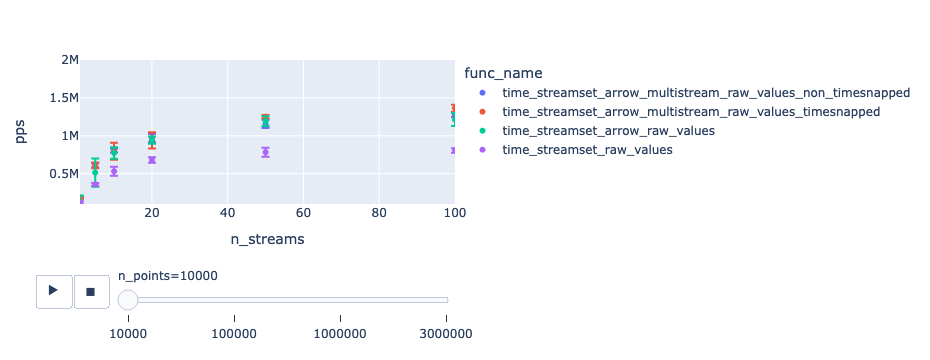

In [180]:
px.scatter(
    data_frame=streamset_avg_time_raw,
    y="pps",
    x="n_streams",
    animation_frame="n_points",
    color="func_name",
    range_x=[1, 100],
    range_y=[100000, 2000000],
    error_y="pps_err",
)

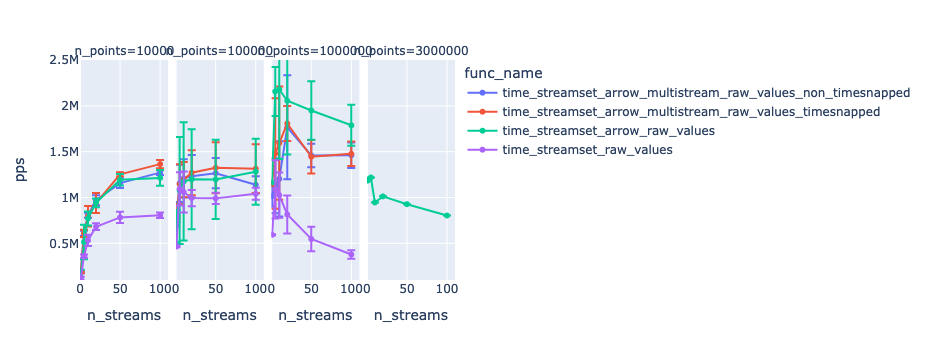

In [183]:
fig = px.line(
    data_frame=streamset_avg_time_raw,
    y="pps",
    x="n_streams",
    color="func_name",
    facet_col="n_points",
    range_x=[0, 110],
    range_y=[100000, 2500000],
    markers=True,
    error_y="pps_err",
)
fig

In [184]:
fig.write_html("facet_col.html")